In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [48]:
df.shape

(13320, 9)

In [49]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [50]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [52]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [53]:
df1 = df[['location', 'size', 'total_sqft', 'bath', 'price']]

In [54]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [55]:
df1.isnull().sum() 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [56]:
df1=df1.dropna()

In [57]:
df1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [58]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split()[0]))

In [59]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [60]:
df1['size']=df1['bhk'].astype(str) + " bhk"

In [61]:
def convertfloat(value):
    try:
        x=float(value)
    except:
        splitval=value.split("-")
        if len(splitval)==2:
            x1,x2=splitval
            x = (float(x1)+float(x2))/2
        else:
            x = np.nan
    return x

In [62]:
df2=df1.copy()

In [63]:
df2['total_sqft']=df2['total_sqft'].apply(lambda x: convertfloat(x))

In [64]:
df2= df2.dropna()

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

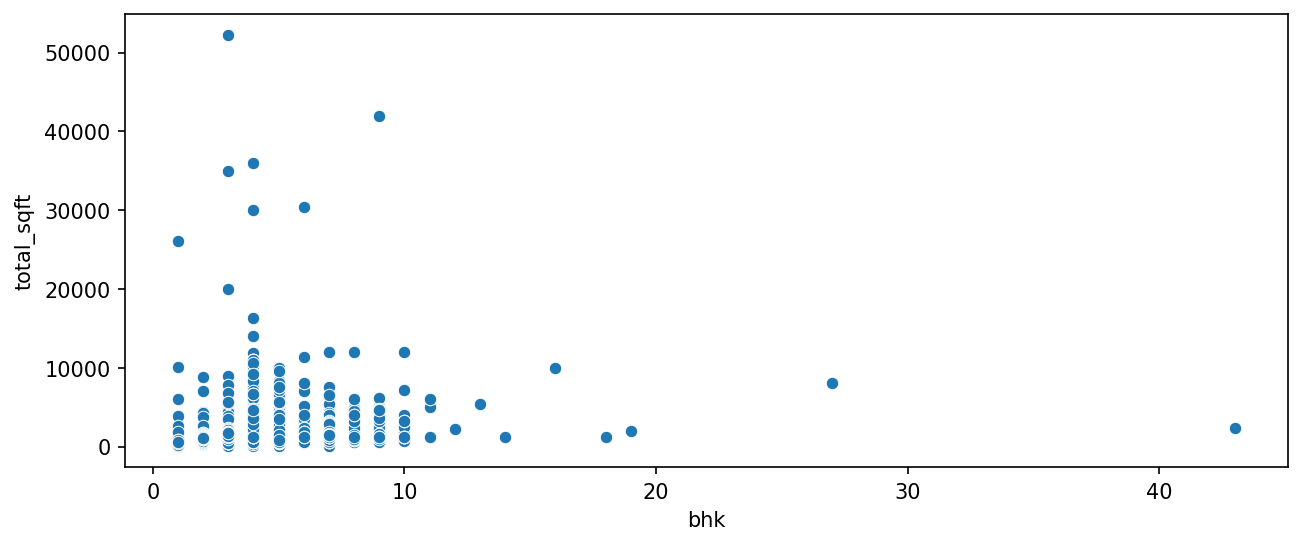

In [65]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df2,x='bhk',y='total_sqft')

In [66]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 bhk,8000.0,27.0,230.0,27
4684,Munnekollal,43 bhk,2400.0,40.0,660.0,43


In [67]:
df2['price_per_sqrft']=(df2.price*100000)/df2.total_sqft

In [68]:
df2.price_per_sqrft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqrft, dtype: float64

In [69]:
df2.to_csv("sample.csv")

In [70]:
df2.location = df2.location.apply(lambda x: x.strip())
locationstats=df2.location.value_counts()
locationstats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [71]:
sum(locationstats[(locationstats.values<10)].values)

2732

In [72]:
sum(locationstats.values)

13200

In [73]:
location_less_than_10=locationstats[(locationstats.values<10)].index

In [74]:
df3=df2.copy()

In [75]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df3.location.unique())

255

In [76]:
df3["location"]= df3["location"].str.upper().str.title()
len(df3.location.unique())

255

In [77]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqrft'],
      dtype='object')

Normally a bhk has a minimum 300 sqft.

In [78]:
len(df3[df3.total_sqft/df3.bhk<300])

744

In [79]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [80]:
df4.shape

(12456, 7)

In [81]:
df4[df4.bath==df4.bhk+2].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
84,Epip Zone,3 bhk,1499.0,5.0,102.0,3,6804.536358
209,Padmanabhanagar,4 bhk,1736.0,6.0,190.0,4,10944.700461
337,Thigalarapalya,4 bhk,3122.0,6.0,230.0,4,7367.072389
490,Old Madras Road,5 bhk,4500.0,7.0,337.0,5,7488.888889
524,Jakkur,4 bhk,5230.0,6.0,465.0,4,8891.013384


Removing outliers of baths having more than number of bhk  + 2

In [82]:
len(df4[df4.bath==df4.bhk+2])

144

In [83]:
df5=df4[~(df4.bath==df4.bhk+2)]

In [84]:
locationlist=df5.location.unique()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


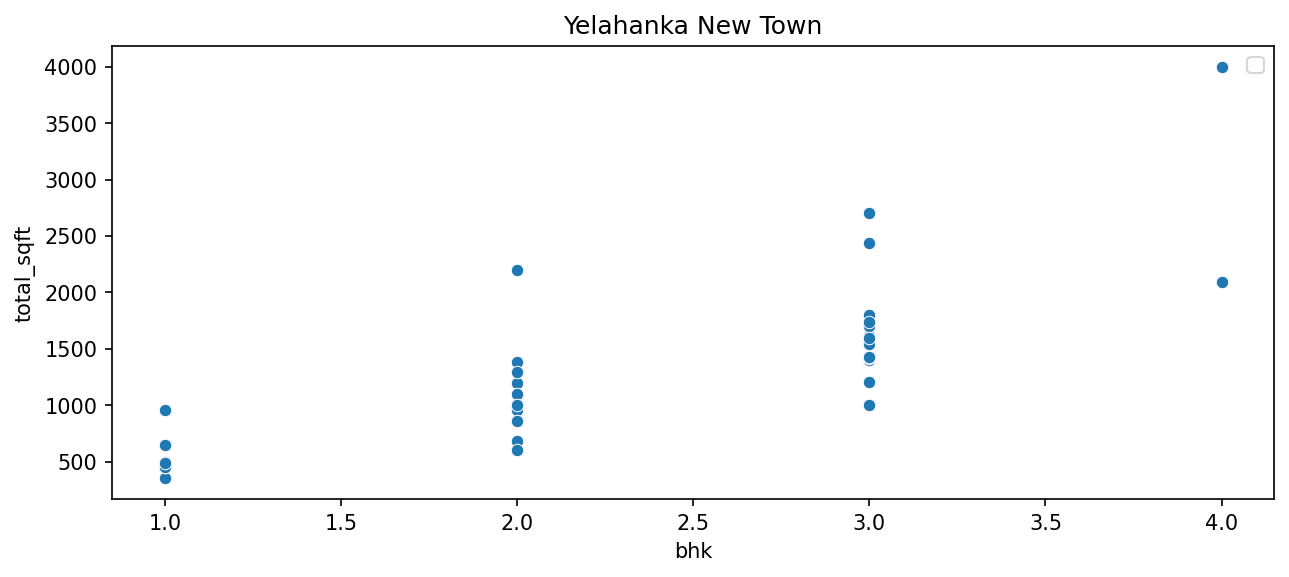

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


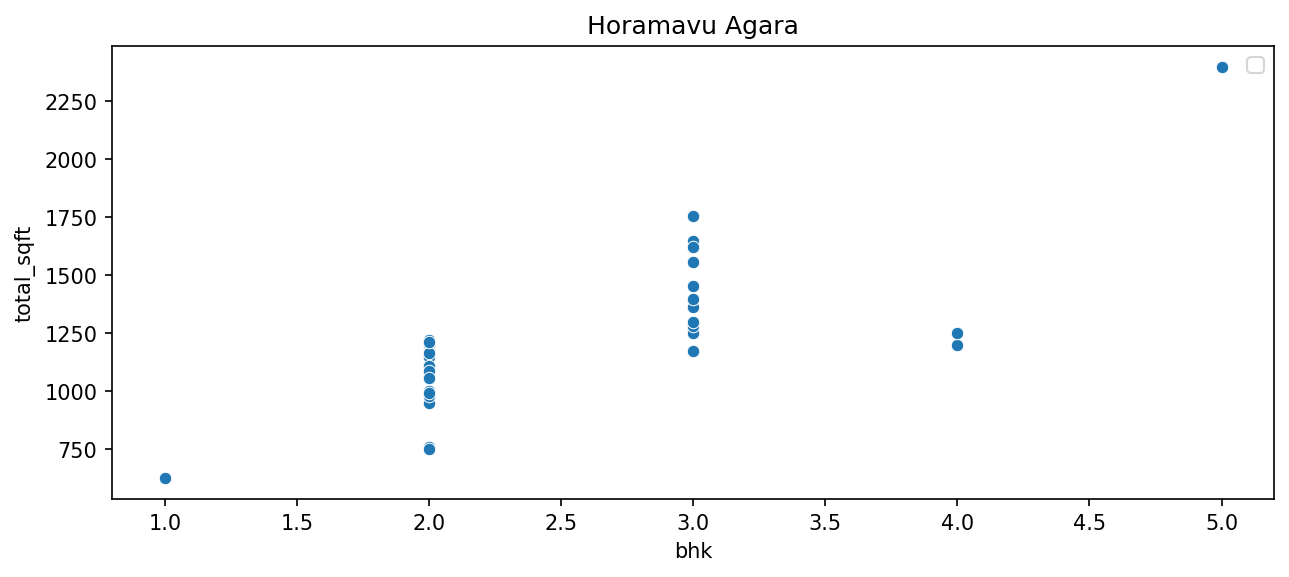

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


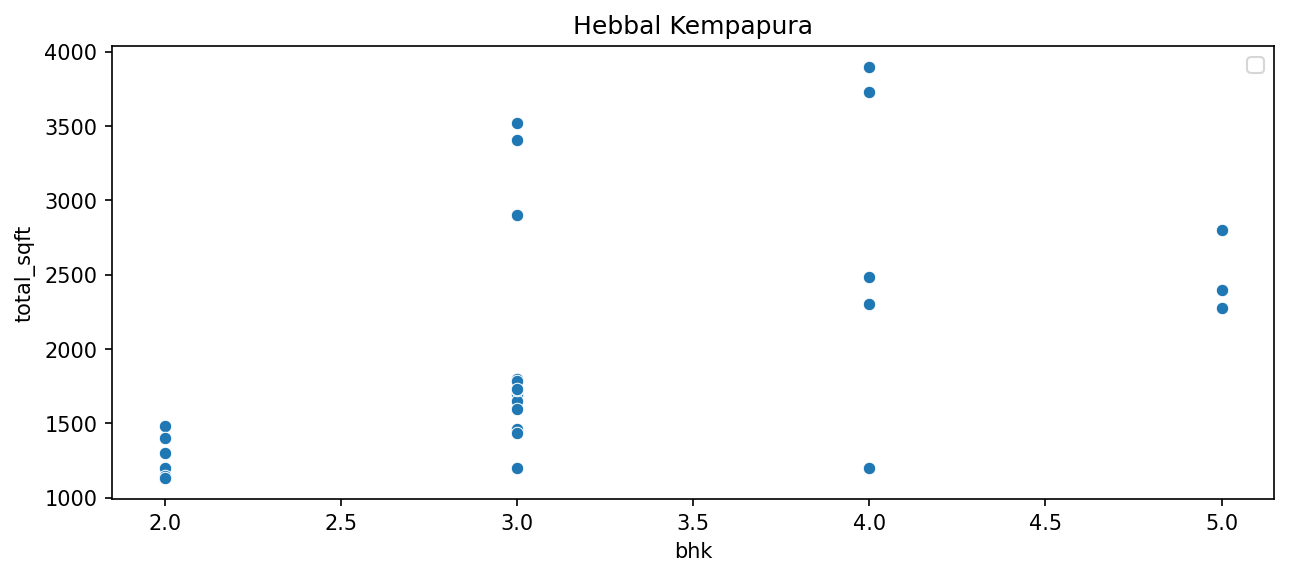

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


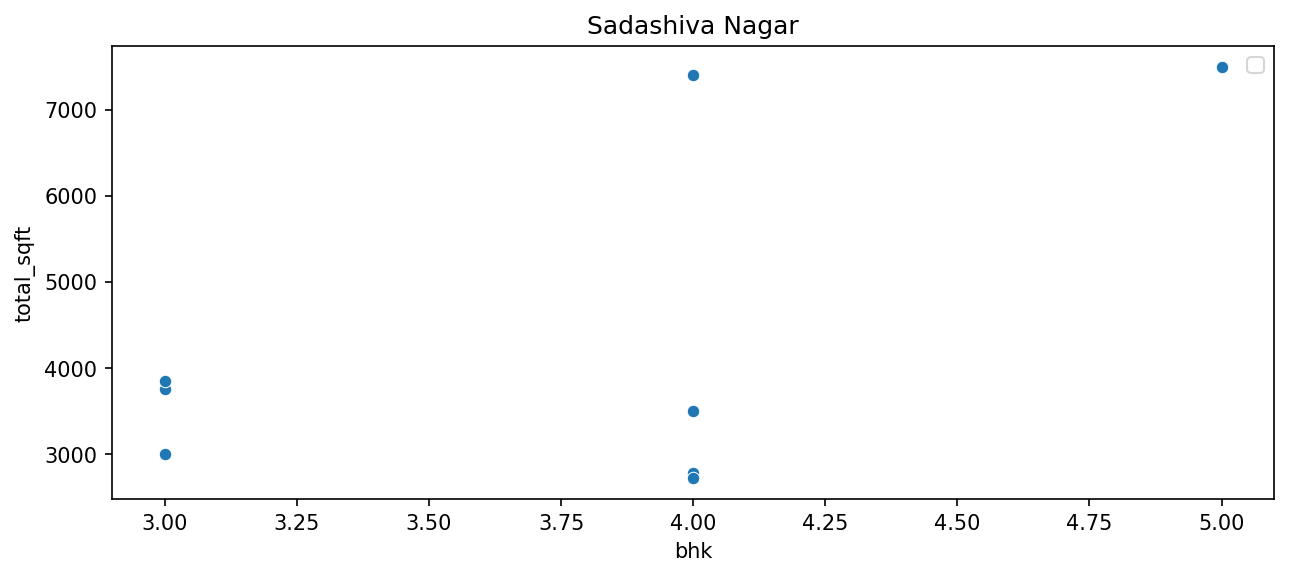

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


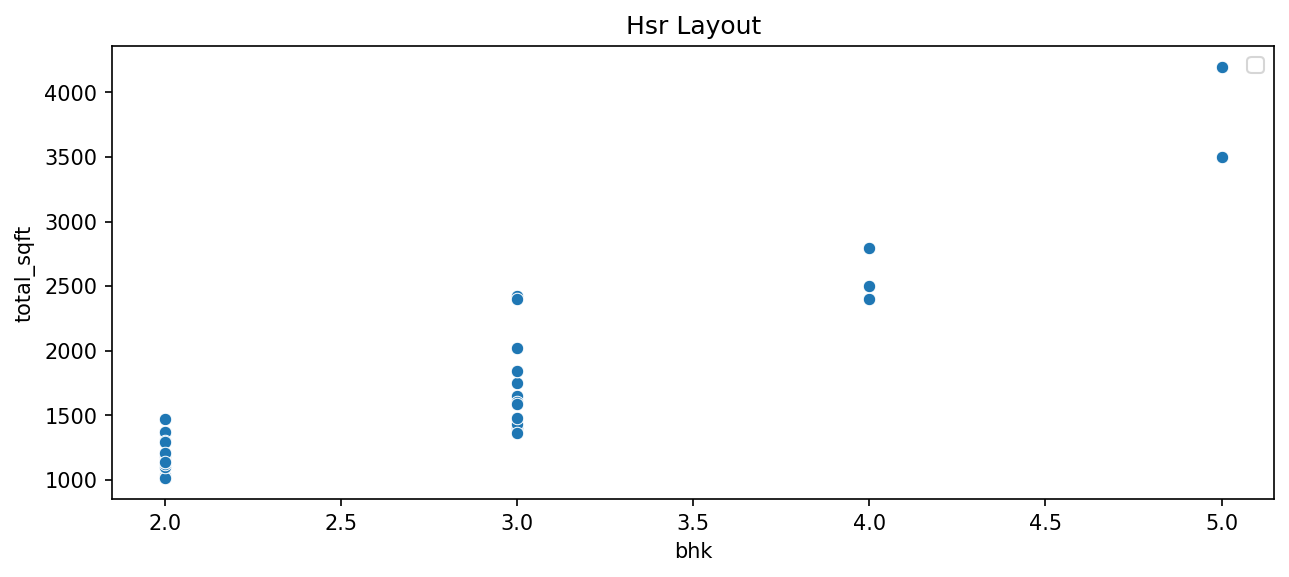

In [85]:
# import random
# def plot_scatter_chart(df,location,x,y):
#     df6 = df[(df.location==location)]
#     plt.figure(figsize=(10,4),dpi=150)
#     sns.scatterplot(data=df6,x=x,y=y)
#     plt.title(location)
#     plt.legend()

# for i in range(5):
#     plot_scatter_chart(df5,locationlist[random.randint(0,len(locationlist)-1)],"bhk","total_sqft")
    
#     plt.show()

In [86]:
import random
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(10,4),dpi=150)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

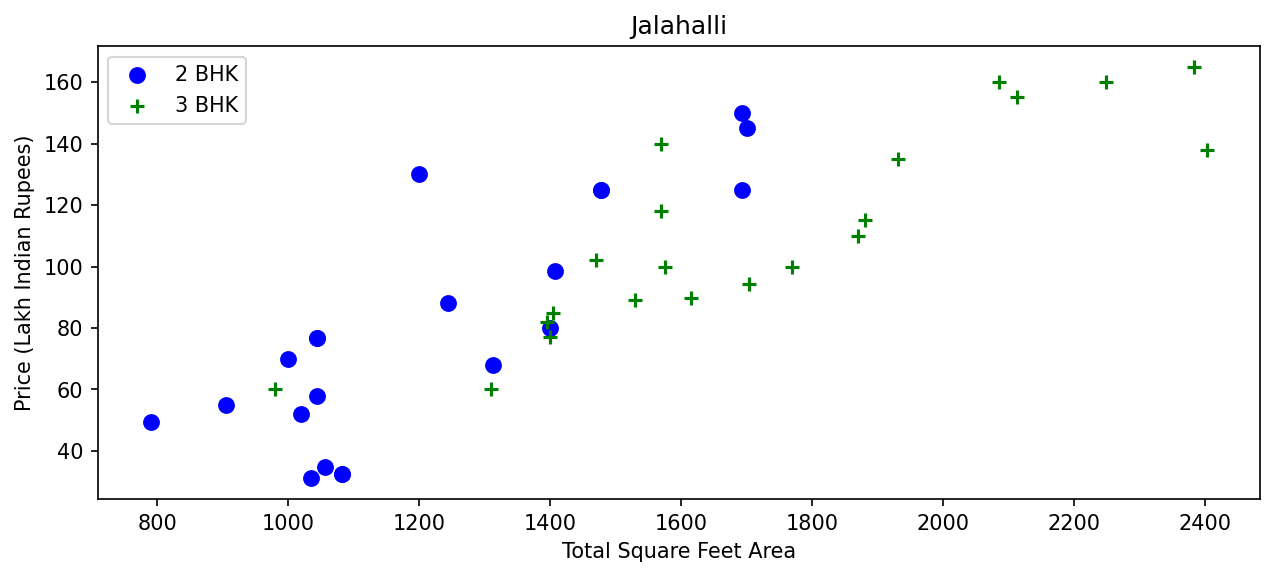

In [87]:
plot_scatter_chart(df5,"Jalahalli")   
# for i in range(5):
#     plot_scatter_chart(df5,locationlist[random.randint(0,len(locationlist)-1)])
#     plt.show()

<Figure size 1500x600 with 0 Axes>

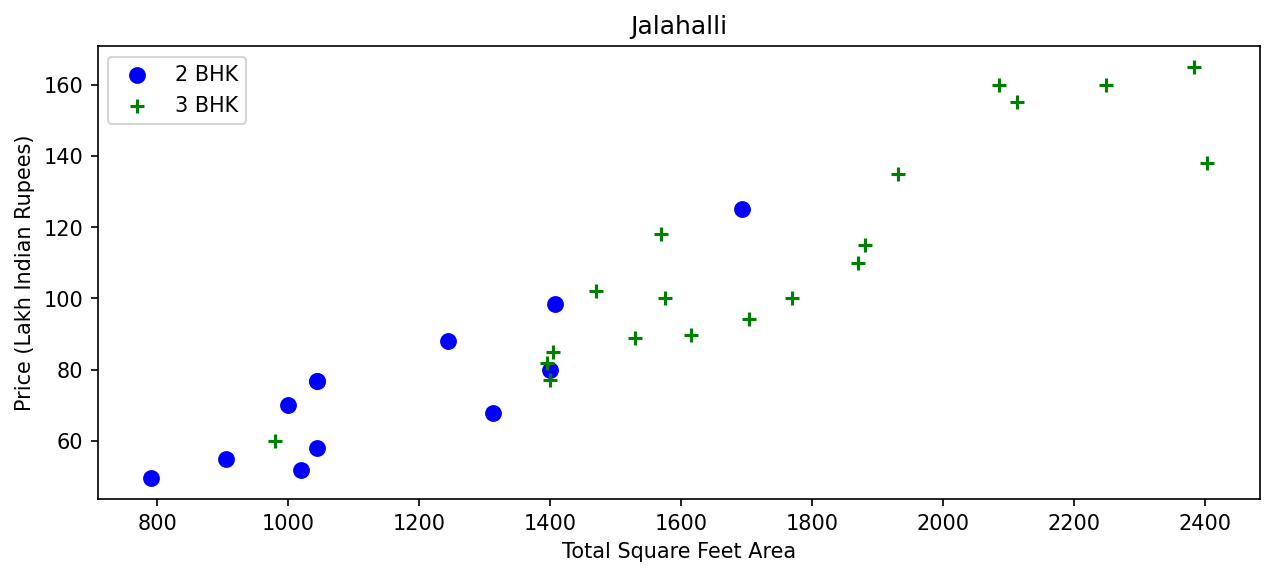

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        # Standard Deviation Method
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduced_df = subdf[(subdf.price_per_sqrft>(m-st)) & (subdf.price_per_sqrft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
plt.figure(figsize=(10,4),dpi=150)
# sns.scatterplot(data=df6,x='bhk',y='total_sqft')
# sns.boxplot(data=df6,x='bhk',y='total_sqft')
plot_scatter_chart(df6,"Jalahalli") 